#Problem statement.

Build a recommender system by using cosine simillarties score.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
book = pd.read_csv('book3.csv',encoding='latin-1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [9]:
book.rename

<bound method DataFrame.rename of       Unnamed: 0  User.ID                                         Book.Title  \
0              1   276726                                Classical Mythology   
1              2   276729                                       Clara Callan   
2              3   276729                               Decision in Normandy   
3              4   276736  Flu: The Story of the Great Influenza Pandemic...   
4              5   276737                             The Mummies of Urumchi   
...          ...      ...                                                ...   
9995        9996   162121       American Fried: Adventures of a Happy Eater.   
9996        9997   162121                              Cannibal In Manhattan   
9997        9998   162121                    How to Flirt: A Practical Guide   
9998        9999   162121                                           Twilight   
9999       10000   162129                       Kids Say the Darndest Things   

     

In [10]:
book.shape

(10000, 4)

In [11]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [12]:
print('Number of Unique Users are {}'.format(len(book['User.ID'].unique())))

Number of Unique Users are 2182


In [13]:
print('Number of Unique Books are {}'.format(len(book['Book.Title'].unique())))

Number of Unique Books are 9659


In [14]:
book['Book.Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

In [15]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [16]:
book.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [22]:
book.rename(columns = {'Book.Title':'title'}, inplace = True)
book.rename(columns = {'Book.Rating':'rating'}, inplace = True)
book.rename(columns = {'User.ID':'ID'}, inplace = True)

In [24]:
book.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: rating, dtype: float64

In [25]:
book.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: rating, dtype: int64

In [27]:
ratings = pd.DataFrame(book.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [29]:
ratings['num of ratings'] = pd.DataFrame(book.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


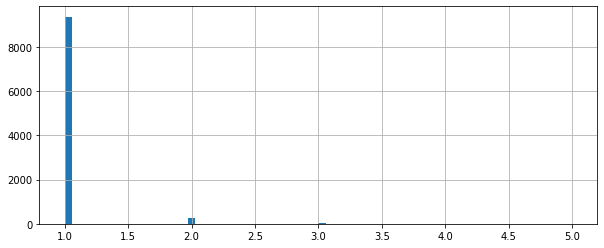

In [30]:
#Data Visualization
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

Text(0.5, 1.0, 'Ratings Frequency')

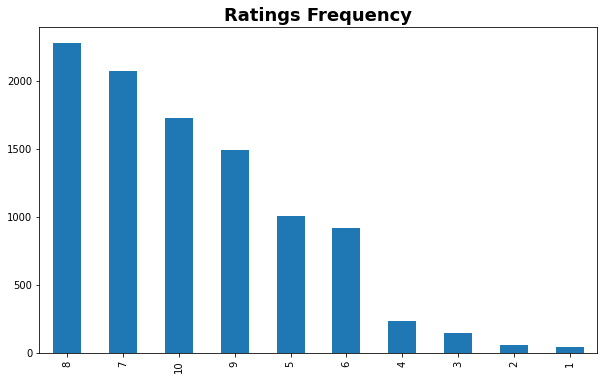

In [33]:
plt.figure(figsize=(10,6))
book['rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 18, fontweight = 'bold')

In [34]:
top_books = book['title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)', 'Life Is Elsewhere',
       'The Golden Compass (His Dark Materials, Book 1)',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object')

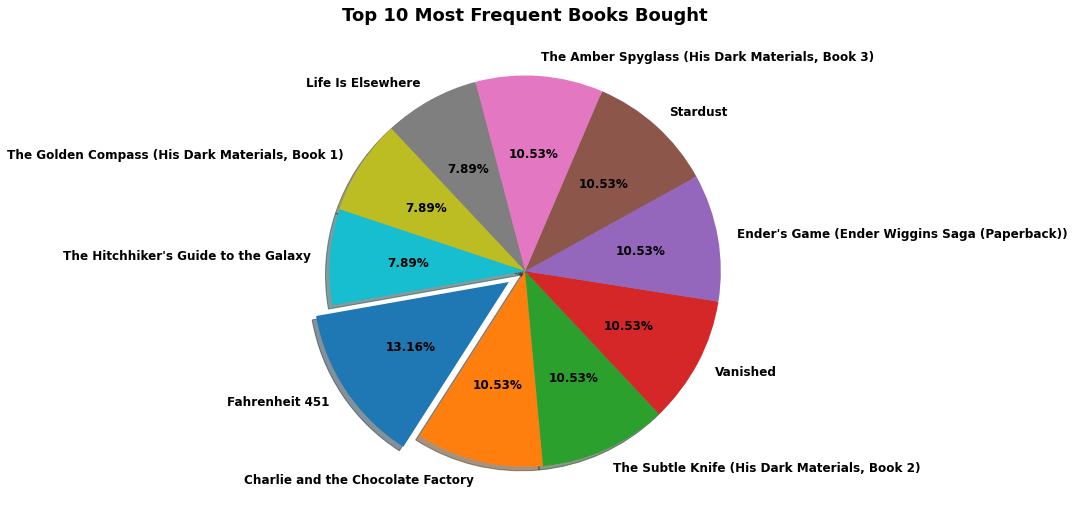

In [35]:
plt.figure(figsize = (16,9))
plt.pie(top_books,
       labels=top_books.index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold')
plt.show()

In [37]:
# Renaming the columns name
book.rename({'Unnamed: 0':'index','User.ID':'user_id','Book.Title':'title','Book.Rating':'rating'}, axis= 1, inplace =True)
book.set_index('index', inplace=True)
book

,ID,title,rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


In [39]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [41]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [49]:
book[(book['ID']==8) | (book['ID']==14)]

,ID,title,rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [52]:
book[(book['ID']==8) | (book['ID']==14)]

,ID,title,rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [55]:
def give_reco(customer_id):
    tem = list(book.sort_values([customer_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(book[book['ID']==i]['title'])
    #print('Common movies within customer',movie_list)
    return set(movie_list)-set(book[book['ID']==customer_id]['title'])

In [56]:
give_reco(14)

KeyError: ignored

In [57]:
give_reco(8)

KeyError: ignored